In [31]:
import pandas as pd
dataset = pd.read_csv('2022_public_lar_csv.csv')
dataset

/var/folders/sv/0r8tdnm153x80h92q2gnrd480000gn/T/ipykernel_45423/4145137352.py:2: DtypeWarning: Columns (22,23,24,26,27,28,29,30,31,32,33,38,43,44,46,77,78,79,80) have mixed types. Specify dtype option on import or set low_memory=False.
  dataset = pd.read_csv('2022_public_lar_csv.csv')


,activity_year,lei,derived_msa_md,state_code,county_code,census_tract,conforming_loan_limit,derived_loan_product_type,derived_dwelling_category,derived_ethnicity,...,denial_reason_2,denial_reason_3,denial_reason_4,tract_population,tract_minority_population_percent,ffiec_msa_md_median_family_income,tract_to_msa_income_percentage,tract_owner_occupied_units,tract_one_to_four_family_homes,tract_median_age_of_housing_units
0,2022,RVDPPPGHCGZ40J4VQ731,26420,TX,48201.0,4.820155e+10,C,Conventional:First Lien,Single Family (1-4 Units):Site-Built,Not Hispanic or Latino,...,NaN,NaN,NaN,6907.0,71.83,90800.0,80.0,1409.0,2002.0,28.0
1,2022,RVDPPPGHCGZ40J4VQ731,19124,TX,48085.0,4.808503e+10,C,FHA:First Lien,Single Family (1-4 Units):Site-Built,Not Hispanic or Latino,...,NaN,NaN,NaN,6001.0,39.96,97400.0,150.0,1255.0,1431.0,14.0
2,2022,RVDPPPGHCGZ40J4VQ731,40900,CA,6017.0,6.017030e+09,C,Conventional:First Lien,Single Family (1-4 Units):Site-Built,Not Hispanic or Latino,...,NaN,NaN,NaN,2703.0,39.92,102400.0,60.0,478.0,1631.0,51.0
3,2022,RVDPPPGHCGZ40J4VQ731,25540,CT,9013.0,9.013538e+09,C,FHA:First Lien,Single Family (1-4 Units):Site-Built,Ethnicity Not Available,...,NaN,NaN,NaN,3948.0,8.61,113200.0,121.0,1271.0,1507.0,42.0
4,2022,RVDPPPGHCGZ40J4VQ731,12580,MD,24510.0,2.451015e+10,C,FHA:First Lien,Single Family (1-4 Units):Site-Built,Ethnicity Not Available,...,NaN,NaN,NaN,3249.0,92.34,116100.0,38.0,444.0,1500.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4589147,2022,KB1H1DSPRFMYMCUFXT09,99999,FL,12063.0,1.206321e+10,C,Conventional:First Lien,Single Family (1-4 Units):Site-Built,Ethnicity Not Available,...,NaN,NaN,NaN,3710.0,32.61,60700.0,117.0,1042.0,1743.0,39.0
4589148,2022,KB1H1DSPRFMYMCUFXT09,35004,NY,36059.0,3.605942e+10,C,Conventional:First Lien,Single Family (1-4 Units):Site-Built,Not Hispanic or Latino,...,NaN,NaN,NaN,4504.0,12.79,146400.0,150.0,1430.0,1490.0,57.0
4589149,2022,KB1H1DSPRFMYMCUFXT09,25540,CT,9003.0,9.003514e+09,C,Conventional:First Lien,Single Family (1-4 Units):Site-Built,Not Hispanic or Latino,...,NaN,NaN,NaN,3160.0,31.23,113200.0,119.0,1148.0,1214.0,44.0
4589150,2022,KB1H1DSPRFMYMCUFXT09,36084,CA,6001.0,6.001433e+09,C,Conventional:First Lien,Single Family (1-4 Units):Site-Built,Not Hispanic or Latino,...,NaN,NaN,NaN,4358.0,81.00,142800.0,0.0,691.0,596.0,44.0


In [32]:
dataset.columns

Index(['activity_year', 'lei', 'derived_msa_md', 'state_code', 'county_code',
       'census_tract', 'conforming_loan_limit', 'derived_loan_product_type',
       'derived_dwelling_category', 'derived_ethnicity', 'derived_race',
       'derived_sex', 'action_taken', 'purchaser_type', 'preapproval',
       'loan_type', 'loan_purpose', 'lien_status', 'reverse_mortgage',
       'open_end_line_of_credit', 'business_or_commercial_purpose',
       'loan_amount', 'combined_loan_to_value_ratio', 'interest_rate',
       'rate_spread', 'hoepa_status', 'total_loan_costs',
       'total_points_and_fees', 'origination_charges', 'discount_points',
       'lender_credits', 'loan_term', 'prepayment_penalty_term',
       'intro_rate_period', 'negative_amortization', 'interest_only_payment',
       'balloon_payment', 'other_nonamortizing_features', 'property_value',
       'construction_method', 'occupancy_type',
       'manufactured_home_secured_property_type',
       'manufactured_home_land_property_in

In [33]:
dataset['action_taken'] = pd.to_numeric(dataset['action_taken'], errors='coerce')

def action(value):
    if value in [1, 2, 6]:
        return 1
    elif value in [3,7,8]:
        return 0
    else:
        return None
dataset['action_taken']=dataset['action_taken'].apply(action)
# For this study purposes, when applicant withdraws the application or preapproval request is approved but not accepted, do not indicate approval or denial of the actual loan application
# So I will drop the observations that had those action status
# Drop rows with NaN values in the 'action_taken' column
dataset.dropna(subset=['action_taken'], inplace=True)

In [34]:
dataset = dataset[dataset['derived_loan_product_type'] == 'Conventional:First Lien']
dataset = dataset[dataset['conforming_loan_limit'] == 'C']
dataset = dataset.drop(columns=['lien_status', 'loan_type','conforming_loan_limit','derived_loan_product_type'])
dataset

,activity_year,lei,derived_msa_md,state_code,county_code,census_tract,derived_dwelling_category,derived_ethnicity,derived_race,derived_sex,...,denial_reason_2,denial_reason_3,denial_reason_4,tract_population,tract_minority_population_percent,ffiec_msa_md_median_family_income,tract_to_msa_income_percentage,tract_owner_occupied_units,tract_one_to_four_family_homes,tract_median_age_of_housing_units
0,2022,RVDPPPGHCGZ40J4VQ731,26420,TX,48201.0,4.820155e+10,Single Family (1-4 Units):Site-Built,Not Hispanic or Latino,Asian,Male,...,NaN,NaN,NaN,6907.0,71.83,90800.0,80.0,1409.0,2002.0,28.0
6,2022,RVDPPPGHCGZ40J4VQ731,15804,NJ,34007.0,3.400760e+10,Single Family (1-4 Units):Site-Built,Ethnicity Not Available,Race Not Available,Joint,...,NaN,NaN,NaN,7573.0,38.57,112900.0,97.0,1955.0,1865.0,57.0
7,2022,RVDPPPGHCGZ40J4VQ731,22744,FL,12011.0,1.201111e+10,Single Family (1-4 Units):Site-Built,Not Hispanic or Latino,White,Male,...,NaN,NaN,NaN,5249.0,95.64,82100.0,99.0,1470.0,1682.0,54.0
9,2022,RVDPPPGHCGZ40J4VQ731,15540,VT,50007.0,5.000700e+10,Single Family (1-4 Units):Site-Built,Ethnicity Not Available,Race Not Available,Sex Not Available,...,NaN,NaN,NaN,4851.0,17.44,109000.0,155.0,1496.0,1603.0,21.0
10,2022,RVDPPPGHCGZ40J4VQ731,99999,CO,8083.0,8.083969e+09,Single Family (1-4 Units):Manufactured,Not Hispanic or Latino,White,Male,...,NaN,NaN,NaN,3265.0,28.48,82500.0,77.0,712.0,1323.0,44.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4589143,2022,KB1H1DSPRFMYMCUFXT09,41700,TX,48493.0,4.849300e+10,Single Family (1-4 Units):Manufactured,Hispanic or Latino,White,Joint,...,9.0,NaN,NaN,2582.0,31.91,84000.0,169.0,773.0,804.0,21.0
4589144,2022,KB1H1DSPRFMYMCUFXT09,31084,CA,6037.0,6.037601e+09,Single Family (1-4 Units):Site-Built,Hispanic or Latino,White,Joint,...,NaN,NaN,NaN,5012.0,94.59,91100.0,69.0,399.0,740.0,47.0
4589146,2022,KB1H1DSPRFMYMCUFXT09,35084,NJ,34013.0,3.401302e+10,Single Family (1-4 Units):Site-Built,Not Hispanic or Latino,White,Female,...,NaN,NaN,NaN,7695.0,50.32,116900.0,136.0,1993.0,2184.0,54.0
4589147,2022,KB1H1DSPRFMYMCUFXT09,99999,FL,12063.0,1.206321e+10,Single Family (1-4 Units):Site-Built,Ethnicity Not Available,Race Not Available,Female,...,NaN,NaN,NaN,3710.0,32.61,60700.0,117.0,1042.0,1743.0,39.0


In [35]:
dataset["derived_sex"].value_counts()/dataset.shape[0] * 100.0

Joint                34.315170
Male                 30.033261
Female               22.176585
Sex Not Available    13.474984
Name: derived_sex, dtype: float64

In [36]:
freq = dataset["action_taken"].value_counts()/dataset.shape[0] * 100.0
print(freq)

1.0    83.681845
0.0    16.318155
Name: action_taken, dtype: float64


In [37]:
dataset = dataset[(dataset["derived_sex"] == "Female") | (dataset["derived_sex"] == "Male")]

In [38]:
#check what variables are missing what fraction of data
missing_fractions = dataset.isnull().mean().sort_values(ascending=False)
missing_fractions.head(40)

co_applicant_ethnicity_5        0.999997
co_applicant_ethnicity_4        0.999997
applicant_ethnicity_5           0.999982
co_applicant_race_5             0.999980
applicant_ethnicity_4           0.999954
co_applicant_race_4             0.999951
co_applicant_ethnicity_3        0.999944
applicant_race_5                0.999775
co_applicant_race_3             0.999687
applicant_race_4                0.999345
denial_reason_4                 0.999217
applicant_ethnicity_3           0.998913
co_applicant_race_2             0.995861
co_applicant_ethnicity_2        0.995742
applicant_race_3                0.995133
denial_reason_3                 0.992837
aus_5                           0.986596
aus_4                           0.985106
multifamily_affordable_units    0.964495
aus_3                           0.962537
denial_reason_2                 0.958513
total_points_and_fees           0.957000
co_applicant_age_above_62       0.938763
prepayment_penalty_term         0.935721
applicant_ethnic

In [39]:
drop_list=sorted(list(missing_fractions[missing_fractions>0.4].index))
print(drop_list)

['applicant_ethnicity_2', 'applicant_ethnicity_3', 'applicant_ethnicity_4', 'applicant_ethnicity_5', 'applicant_race_2', 'applicant_race_3', 'applicant_race_4', 'applicant_race_5', 'aus_2', 'aus_3', 'aus_4', 'aus_5', 'co_applicant_age_above_62', 'co_applicant_ethnicity_2', 'co_applicant_ethnicity_3', 'co_applicant_ethnicity_4', 'co_applicant_ethnicity_5', 'co_applicant_race_2', 'co_applicant_race_3', 'co_applicant_race_4', 'co_applicant_race_5', 'denial_reason_2', 'denial_reason_3', 'denial_reason_4', 'discount_points', 'intro_rate_period', 'lender_credits', 'multifamily_affordable_units', 'prepayment_penalty_term', 'total_points_and_fees']


In [40]:
dataset.drop(labels=drop_list, axis=1, inplace=True)
print(dataset.shape)
print(sorted(dataset.columns))

(1097369, 65)
['action_taken', 'activity_year', 'applicant_age', 'applicant_age_above_62', 'applicant_credit_score_type', 'applicant_ethnicity_1', 'applicant_ethnicity_observed', 'applicant_race_1', 'applicant_race_observed', 'applicant_sex', 'applicant_sex_observed', 'aus_1', 'balloon_payment', 'business_or_commercial_purpose', 'census_tract', 'co_applicant_age', 'co_applicant_credit_score_type', 'co_applicant_ethnicity_1', 'co_applicant_ethnicity_observed', 'co_applicant_race_1', 'co_applicant_race_observed', 'co_applicant_sex', 'co_applicant_sex_observed', 'combined_loan_to_value_ratio', 'construction_method', 'county_code', 'debt_to_income_ratio', 'denial_reason_1', 'derived_dwelling_category', 'derived_ethnicity', 'derived_msa_md', 'derived_race', 'derived_sex', 'ffiec_msa_md_median_family_income', 'hoepa_status', 'income', 'initially_payable_to_institution', 'interest_only_payment', 'interest_rate', 'lei', 'loan_amount', 'loan_purpose', 'loan_term', 'manufactured_home_land_proper

/var/folders/sv/0r8tdnm153x80h92q2gnrd480000gn/T/ipykernel_45423/3318141670.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset.drop(labels=drop_list, axis=1, inplace=True)


In [41]:
keep_list = ['action_taken', 'aus_1','applicant_credit_score_type', 'balloon_payment', 'business_or_commercial_purpose', 'co_applicant_credit_score_type', 'combined_loan_to_value_ratio', 'debt_to_income_ratio', 'derived_dwelling_category',
             'derived_race', 'derived_sex', 'ffiec_msa_md_median_family_income', 'hoepa_status', 'income', 'initially_payable_to_institution', 'interest_only_payment',
             'loan_amount', 'loan_purpose', 'negative_amortization', 'occupancy_type', 'preapproval', 'property_value',
             'purchaser_type', 'total_units', 'open_end_line_of_credit', 'tract_owner_occupied_units','derived_msa_md','tract_median_age_of_housing_units', 'tract_minority_population_percent', 'tract_one_to_four_family_homes',
             'tract_population', 'tract_to_msa_income_percentage']

dataset = dataset[keep_list]
print(dataset.shape)
dataset.info()

(1097369, 32)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1097369 entries, 0 to 4589147
Data columns (total 32 columns):
 #   Column                             Non-Null Count    Dtype  
---  ------                             --------------    -----  
 0   action_taken                       1097369 non-null  float64
 1   aus_1                              1097369 non-null  float64
 2   applicant_credit_score_type        1097369 non-null  float64
 3   balloon_payment                    1097369 non-null  float64
 4   business_or_commercial_purpose     1097369 non-null  float64
 5   co_applicant_credit_score_type     1097369 non-null  float64
 6   combined_loan_to_value_ratio       1048281 non-null  object 
 7   debt_to_income_ratio               1040354 non-null  object 
 8   derived_dwelling_category          1097369 non-null  object 
 9   derived_race                       1097369 non-null  object 
 10  derived_sex                        1097369 non-null  object 
 11  ffiec_msa_

In [42]:
import pandas as pd
import numpy as np

sampled_data = dataset

numerical_cols = ['ffiec_msa_md_median_family_income', 'income', 
                  'combined_loan_to_value_ratio', 'property_value', 
                  'loan_amount', 'tract_owner_occupied_units', 'derived_msa_md', 
                  'tract_median_age_of_housing_units', 'tract_minority_population_percent', 
                  'tract_one_to_four_family_homes', 'tract_population', 
                  'tract_to_msa_income_percentage']

# Convert, round, and replace infinite values
for col in numerical_cols:
    # Convert to numeric, coerce errors to NaN
    converted_col = pd.to_numeric(sampled_data[col], errors='coerce')
    # Round the numeric values
    rounded_col = converted_col.round(5)
    # Replace infinities with NaN
    processed_col = rounded_col.replace([np.inf, -np.inf], np.nan)
    # Replace the column in the original DataFrame
    sampled_data[col] = processed_col

# Display the info of the updated DataFrame to check the changes
sampled_data.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1097369 entries, 0 to 4589147
Data columns (total 32 columns):
 #   Column                             Non-Null Count    Dtype  
---  ------                             --------------    -----  
 0   action_taken                       1097369 non-null  float64
 1   aus_1                              1097369 non-null  float64
 2   applicant_credit_score_type        1097369 non-null  float64
 3   balloon_payment                    1097369 non-null  float64
 4   business_or_commercial_purpose     1097369 non-null  float64
 5   co_applicant_credit_score_type     1097369 non-null  float64
 6   combined_loan_to_value_ratio       1009372 non-null  float64
 7   debt_to_income_ratio               1040354 non-null  object 
 8   derived_dwelling_category          1097369 non-null  object 
 9   derived_race                       1097369 non-null  object 
 10  derived_sex                        1097369 non-null  object 
 11  ffiec_msa_md_median_fami

In [43]:
sampled_data['income']=np.log1p(sampled_data['income'])
sampled_data = sampled_data.replace([np.inf, -np.inf], np.nan)
sampled_data = sampled_data.dropna()

/Users/visharlya/.virtualenvs/py3cv4/lib/python3.10/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/visharlya/.virtualenvs/py3cv4/lib/python3.10/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [44]:
import numpy as np
import pandas as pd

# Initialize a dictionary to store the count of outliers for each column
outliers_count = {}

for col in numerical_cols:
    Q1 = sampled_data[col].quantile(0.25)
    Q3 = sampled_data[col].quantile(0.75)
    IQR = Q3 - Q1

    # Define the bounds for outliers
    lower_bound = Q1 - 5 * IQR
    upper_bound = Q3 + 5 * IQR

    # Find and count outliers in the current column
    outliers = (sampled_data[col] < lower_bound) | (sampled_data[col] > upper_bound)
    outliers_count[col] = np.sum(outliers)

# Print the number of outliers in each column
for col, count in outliers_count.items():
    print(f"{col}: {count} outliers")


ffiec_msa_md_median_family_income: 0 outliers
income: 150 outliers
combined_loan_to_value_ratio: 416 outliers
property_value: 4066 outliers
loan_amount: 88 outliers
tract_owner_occupied_units: 276 outliers
derived_msa_md: 0 outliers
tract_median_age_of_housing_units: 0 outliers
tract_minority_population_percent: 0 outliers
tract_one_to_four_family_homes: 210 outliers
tract_population: 1630 outliers
tract_to_msa_income_percentage: 121 outliers


       ffiec_msa_md_median_family_income
count                          968255.00
mean                            91111.06
std                             24129.26
min                                 0.00
25%                             80300.00
50%                             90800.00
75%                            101100.00
max                            168300.00


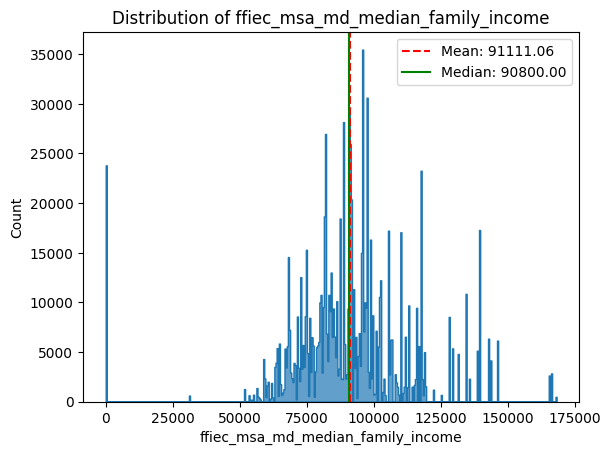

          income
count  968255.00
mean        4.41
std         0.79
min         0.00
25%         4.01
50%         4.41
75%         4.84
max        14.60


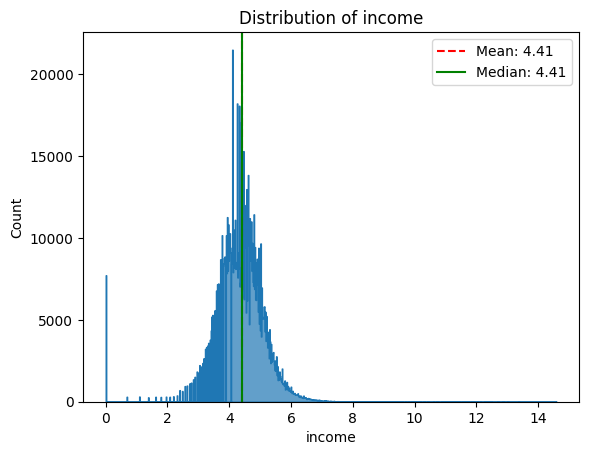

       combined_loan_to_value_ratio
count                     968255.00
mean                          74.76
std                         3051.20
min                            0.00
25%                           58.33
50%                           76.80
75%                           90.00
max                      3000000.00


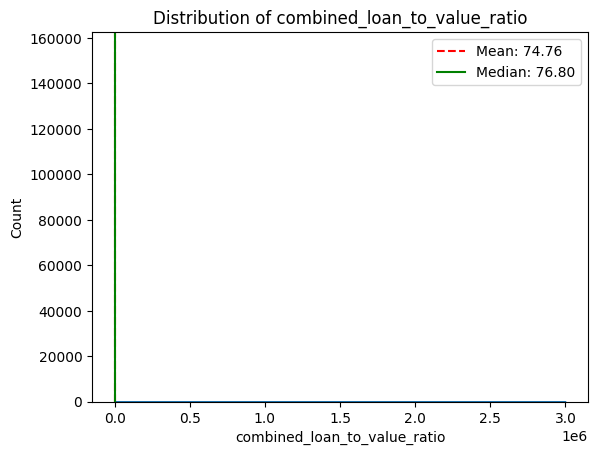

       property_value
count        968255.0
mean         407908.3
std         1429048.5
min            5000.0
25%          225000.0
50%          335000.0
75%          505000.0
max       800005000.0


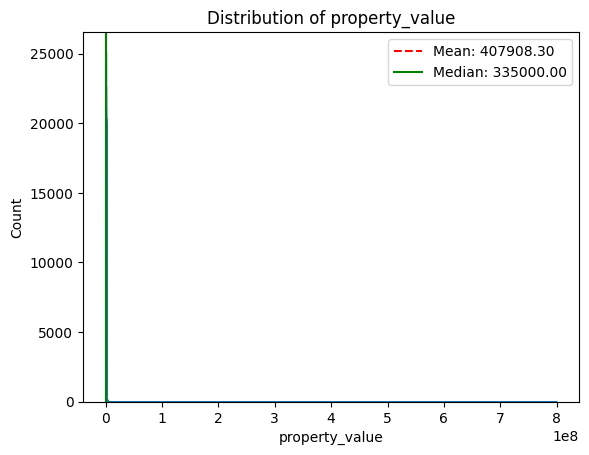

       loan_amount
count    968255.00
mean     266866.79
std      167815.26
min        5000.00
25%      145000.00
50%      235000.00
75%      355000.00
max     1865000.00


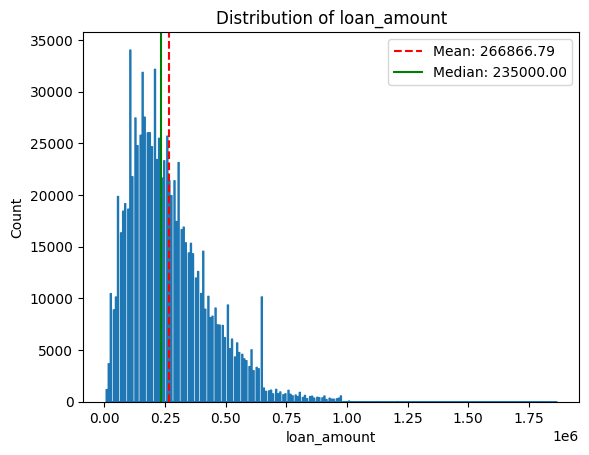

       tract_owner_occupied_units
count                   968255.00
mean                      1179.62
std                        600.28
min                          0.00
25%                        775.00
50%                       1132.00
75%                       1531.00
max                       6276.00


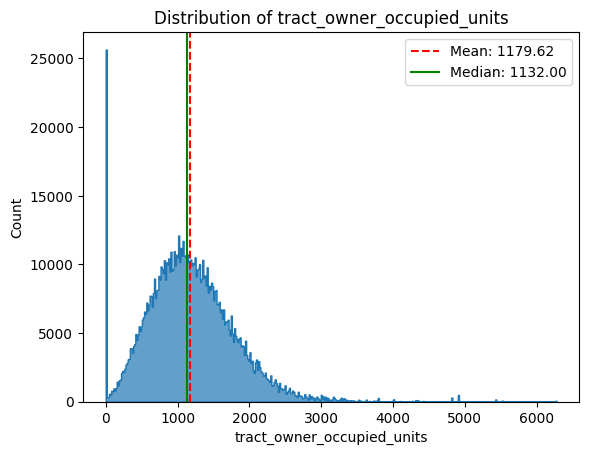

       derived_msa_md
count       968255.00
mean         36352.15
std          24126.70
min              0.00
25%          19740.00
50%          33340.00
75%          41700.00
max          99999.00


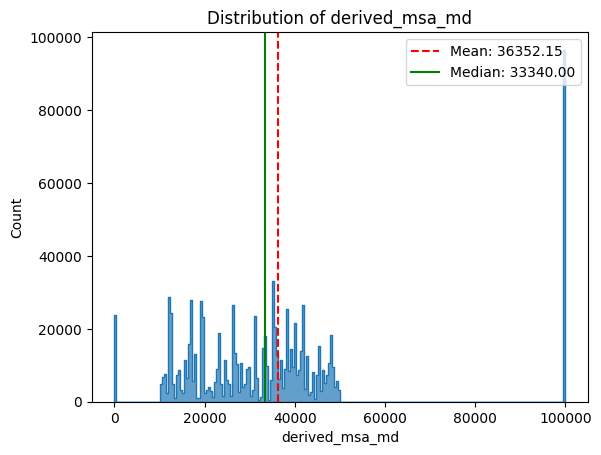

       tract_median_age_of_housing_units
count                          968255.00
mean                               35.53
std                                19.12
min                                 0.00
25%                                22.00
50%                                35.00
75%                                49.00
max                                80.00


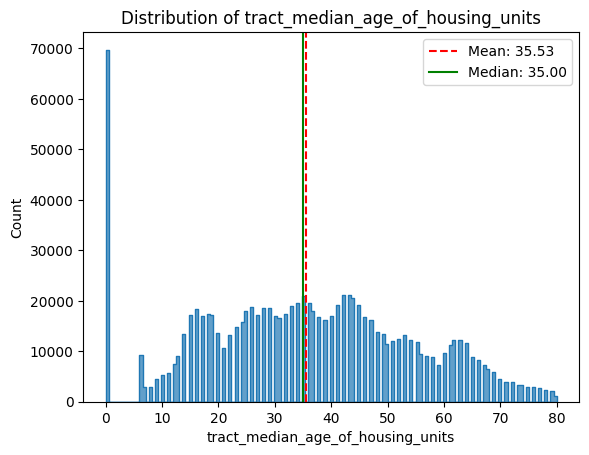

       tract_minority_population_percent
count                          968255.00
mean                               37.94
std                                26.53
min                                 0.00
25%                                16.38
50%                                31.05
75%                                55.65
max                               100.00


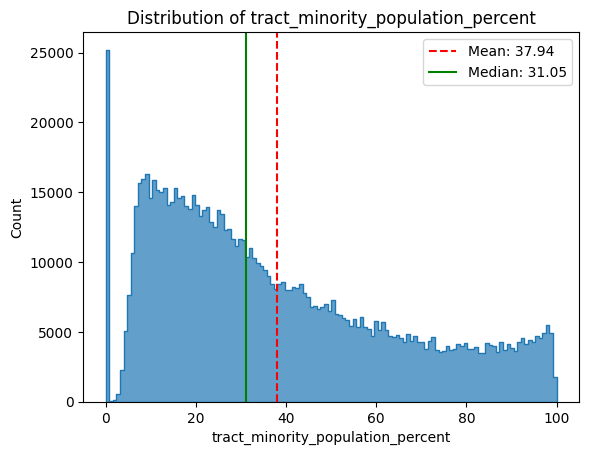

       tract_one_to_four_family_homes
count                       968255.00
mean                          1585.86
std                            723.72
min                              0.00
25%                           1139.00
50%                           1561.00
75%                           2007.00
max                           8233.00


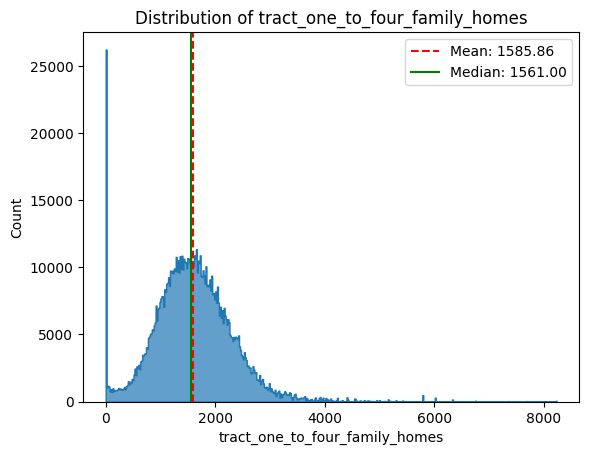

       tract_population
count         968255.00
mean            4716.93
std             2222.91
min                0.00
25%             3371.00
50%             4500.00
75%             5817.50
max            30199.00


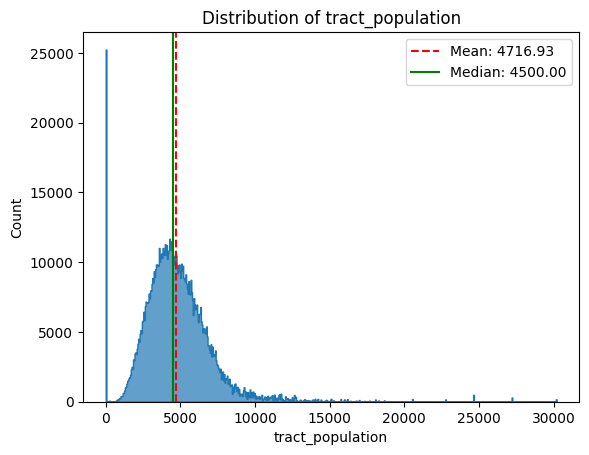

       tract_to_msa_income_percentage
count                       968255.00
mean                           105.01
std                             42.70
min                              0.00
25%                             80.00
50%                            102.00
75%                            127.00
max                            516.00


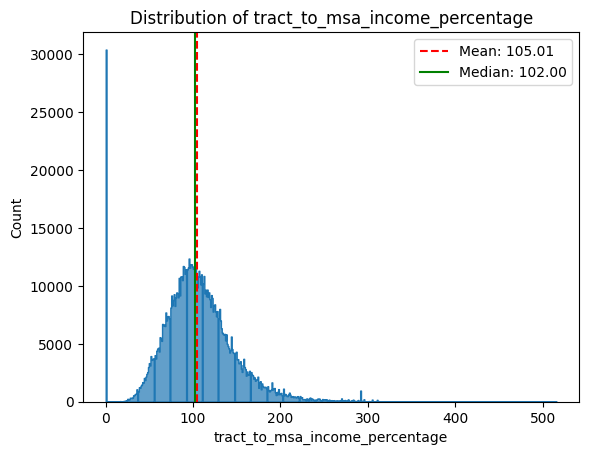

In [45]:
import seaborn as sns
import matplotlib.pyplot as plt

# Function to explore and visualize each numerical column
def explore_column(data, column_name):
    # Display summary statistics
    print(data[[column_name]].describe().round(2))

    # Visualize the distribution
    sns.histplot(data[column_name], alpha=0.7, element='step')
    
    # Calculate the mean and median
    mean_value = data[column_name].mean()
    median_value = data[column_name].median()

    # Add a red line at the mean value & green line at the median
    plt.axvline(x=mean_value, color='red', linestyle='--', label=f"Mean: {mean_value:.2f}")
    plt.axvline(x=median_value, color='green', label=f"Median: {median_value:.2f}")

    # Add title, labels, and legend
    plt.title(f"Distribution of {column_name}")
    plt.xlabel(column_name)
    plt.legend()

    # Show the plot
    plt.show()

# Assuming sampled_data is your DataFrame and numerical_cols contains the names of the numerical columns
for col in numerical_cols:
    explore_column(sampled_data, col)


In [46]:
from scipy.stats.mstats import winsorize

winsorized_count = {}

for col in numerical_cols:
    original_data = sampled_data[col]
    
    # Winsorize the data without replacing it in the dataframe
    winsorized_data = winsorize(original_data, limits=(0.05, 0.05))
    
    # Count the number of changes
    lower_count = np.sum(original_data < winsorized_data.data)
    upper_count = np.sum(original_data > winsorized_data.data)
    
    # Store the count in the dictionary
    winsorized_count[col] = {'lower': lower_count, 'upper': upper_count}

winsorized_count


{'ffiec_msa_md_median_family_income': {'lower': 46587, 'upper': 47278},
 'income': {'lower': 45622, 'upper': 48335},
 'combined_loan_to_value_ratio': {'lower': 48408, 'upper': 30378},
 'property_value': {'lower': 45774, 'upper': 48407},
 'loan_amount': {'lower': 34496, 'upper': 47439},
 'tract_owner_occupied_units': {'lower': 48275, 'upper': 48370},
 'derived_msa_md': {'lower': 45705, 'upper': 0},
 'tract_median_age_of_housing_units': {'lower': 0, 'upper': 45077},
 'tract_minority_population_percent': {'lower': 48194, 'upper': 48398},
 'tract_one_to_four_family_homes': {'lower': 48368, 'upper': 48383},
 'tract_population': {'lower': 48397, 'upper': 48396},
 'tract_to_msa_income_percentage': {'lower': 47912, 'upper': 47930}}

In [47]:
# Initialize a boolean array where all values are False
outliers_mask = np.zeros(len(sampled_data), dtype=bool)

for col in numerical_cols:
    Q1 = sampled_data[col].quantile(0.25)
    Q3 = sampled_data[col].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 2 * IQR
    upper_bound = Q3 + 2 * IQR

    # Update the outliers_mask to include rows with outliers in the current column
    outliers_mask = outliers_mask | (sampled_data[col] < lower_bound) | (sampled_data[col] > upper_bound)

# Count rows with at least one outlier
num_rows_with_outliers = np.sum(outliers_mask)
print(f"Rows with at least one outlier: {num_rows_with_outliers}")

Rows with at least one outlier: 204510


In [48]:
# Initialize a boolean array where all values are False
outliers_mask = np.zeros(len(sampled_data), dtype=bool)

for col in numerical_cols:
    Q1 = sampled_data[col].quantile(0.25)
    Q3 = sampled_data[col].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 2 * IQR
    upper_bound = Q3 + 2 * IQR

    # Update the outliers_mask to include rows with outliers in the current column
    outliers_mask = outliers_mask | (sampled_data[col] < lower_bound) | (sampled_data[col] > upper_bound)
# Remove rows with any outliers
sampled_data = sampled_data[~outliers_mask]
print(f"Number of rows after removing those with any outliers: {sampled_data.shape[0]}")


Number of rows after removing those with any outliers: 763745


In [49]:
from sklearn.preprocessing import MinMaxScaler

min_max_scaler = MinMaxScaler()
numeric_df_clean_min_max_scaled = min_max_scaler.fit_transform(sampled_data[numerical_cols])
numeric_df_clean = pd.DataFrame(numeric_df_clean_min_max_scaled, columns=numerical_cols)
for column in numeric_df_clean.columns:
    sampled_data[column] = numeric_df_clean[column]

In [50]:
rows_with_missing_values = sampled_data.isna().any(axis=1).sum()
print(f"Number of rows with any missing values: {rows_with_missing_values}")

Number of rows with any missing values: 631833


In [51]:
sampled_data = sampled_data.dropna()
print(f"Number of rows after removing those with any missing values: {sampled_data.shape[0]}")

Number of rows after removing those with any missing values: 131912


In [52]:
nan_count = sampled_data.isna().sum()
print(nan_count)

action_taken                         0
aus_1                                0
applicant_credit_score_type          0
balloon_payment                      0
business_or_commercial_purpose       0
co_applicant_credit_score_type       0
combined_loan_to_value_ratio         0
debt_to_income_ratio                 0
derived_dwelling_category            0
derived_race                         0
derived_sex                          0
ffiec_msa_md_median_family_income    0
hoepa_status                         0
income                               0
initially_payable_to_institution     0
interest_only_payment                0
loan_amount                          0
loan_purpose                         0
negative_amortization                0
occupancy_type                       0
preapproval                          0
property_value                       0
purchaser_type                       0
total_units                          0
open_end_line_of_credit              0
tract_owner_occupied_unit

In [53]:
pd.crosstab(sampled_data["derived_sex"], sampled_data["action_taken"])/sampled_data.shape[0] * 100.0

action_taken,0.0,1.0
derived_sex,,
Female,5.163291,37.155073
Male,7.387501,50.294135


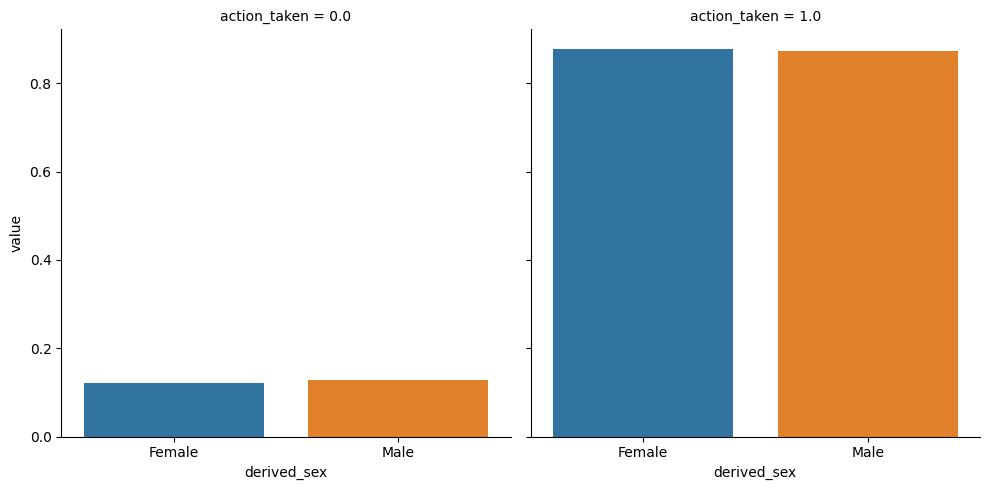

In [54]:
d = pd.crosstab(sampled_data["derived_sex"], sampled_data["action_taken"])
d = d.div(d.sum(axis=1), axis=0)

c = d.stack().reset_index().rename(columns={0: 'value'})

g = sns.catplot(data=c, x='derived_sex', y='value', col='action_taken', kind="bar", height=5)

In [55]:
from sklearn.preprocessing import OrdinalEncoder
sampled_data['total_units'] = sampled_data['total_units'].astype(str)
encoder = OrdinalEncoder()
categorical_columns = [col for col in sampled_data.columns if col not in numerical_cols]
sampled_data[categorical_columns] = encoder.fit_transform(sampled_data[categorical_columns])
sampled_data[categorical_columns]

,action_taken,aus_1,applicant_credit_score_type,balloon_payment,business_or_commercial_purpose,co_applicant_credit_score_type,debt_to_income_ratio,derived_dwelling_category,derived_race,derived_sex,hoepa_status,initially_payable_to_institution,interest_only_payment,loan_purpose,negative_amortization,occupancy_type,preapproval,purchaser_type,total_units,open_end_line_of_credit
0,1.0,0.0,1.0,1.0,1.0,8.0,8.0,1.0,2.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
7,1.0,0.0,8.0,1.0,1.0,2.0,11.0,1.0,8.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,2.0,0.0,1.0
17,1.0,1.0,0.0,1.0,1.0,8.0,9.0,1.0,8.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,2.0,0.0,1.0
25,1.0,1.0,1.0,1.0,1.0,8.0,1.0,1.0,2.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,2.0,0.0,1.0
30,1.0,0.0,0.0,1.0,1.0,8.0,10.0,1.0,7.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,2.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
763720,1.0,1.0,1.0,1.0,1.0,8.0,17.0,1.0,7.0,0.0,1.0,0.0,1.0,4.0,1.0,0.0,1.0,7.0,0.0,1.0
763722,1.0,0.0,0.0,1.0,1.0,8.0,4.0,1.0,3.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
763724,1.0,1.0,1.0,1.0,1.0,8.0,6.0,1.0,7.0,0.0,1.0,0.0,1.0,4.0,1.0,0.0,1.0,7.0,0.0,1.0
763730,1.0,0.0,0.0,1.0,1.0,8.0,6.0,1.0,8.0,1.0,1.0,0.0,1.0,4.0,1.0,0.0,1.0,7.0,0.0,1.0


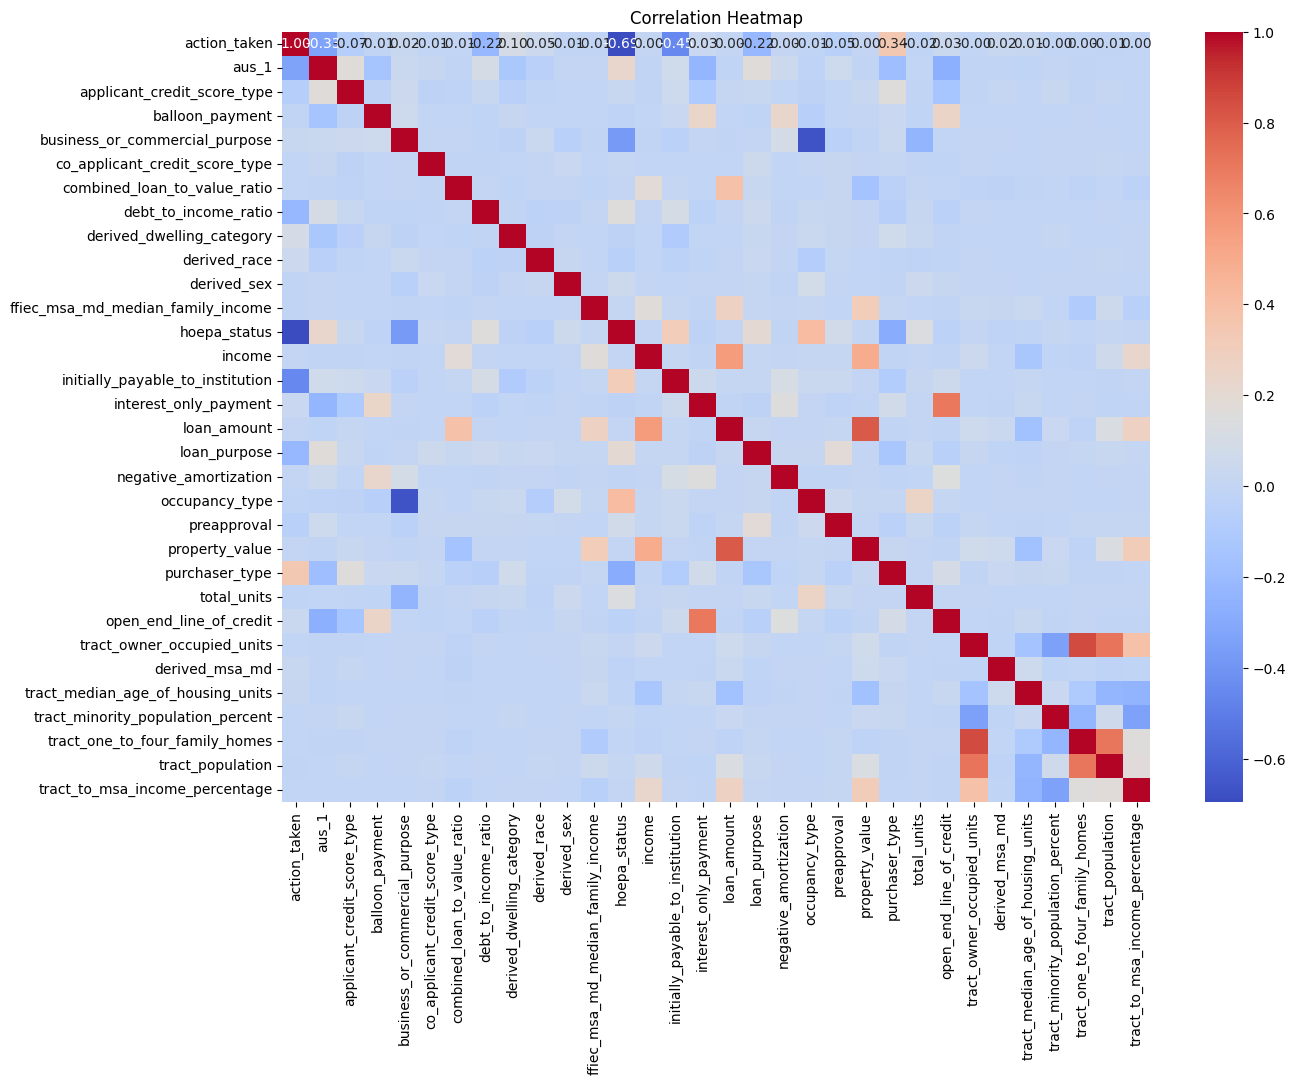

In [56]:
import matplotlib.pyplot as plt
import seaborn as sns
corr_matrix = sampled_data.corr()
plt.figure(figsize=(14, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

In [57]:
sampled_data.to_csv('sex_dataset.csv')

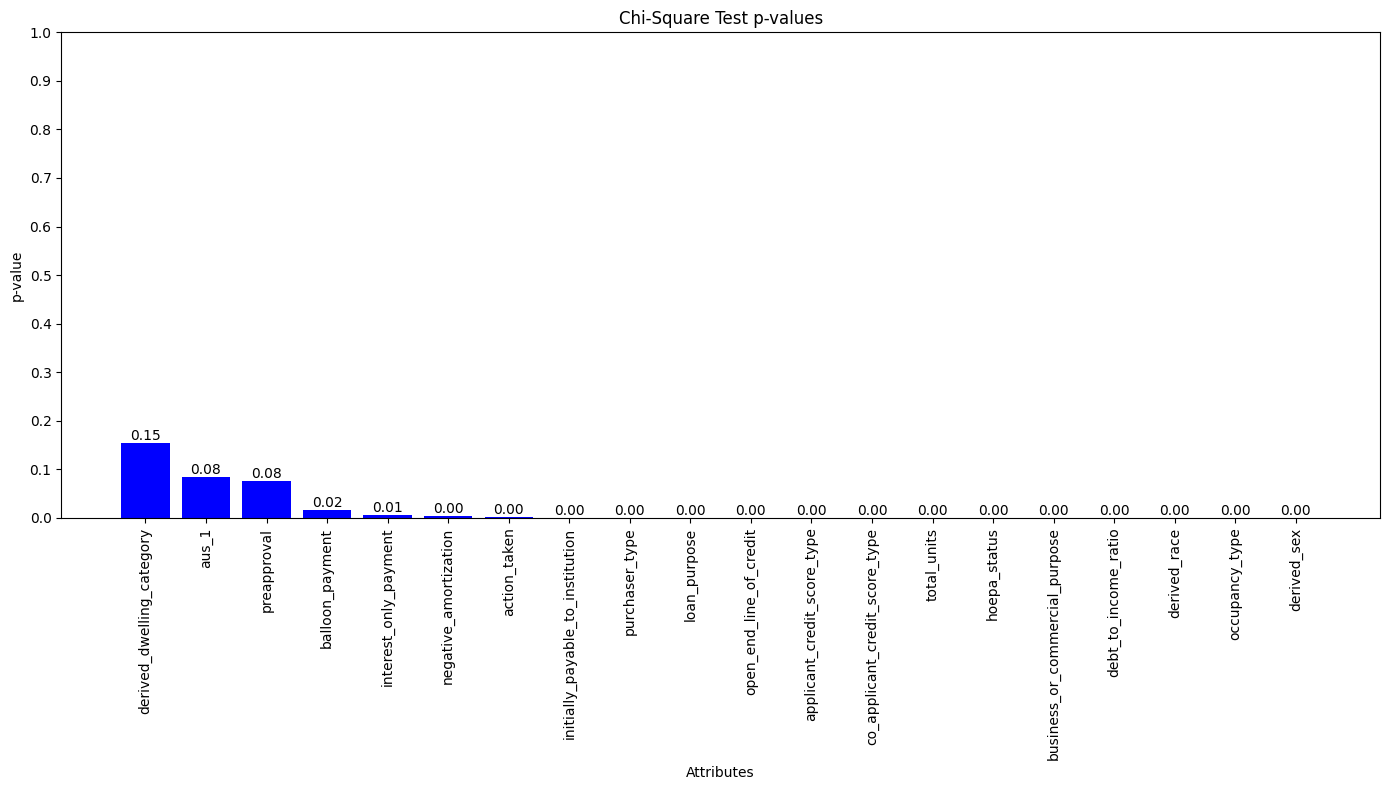

In [58]:
import pandas as pd
from scipy.stats import chi2_contingency
import matplotlib.pyplot as plt
import numpy as np

# Load your data
data = pd.read_csv("sex_dataset.csv")

# Perform Chi-Square test and collect p-values
chi_square_results = []
for attr in categorical_columns:
    contingency_table = pd.crosstab(data[attr], data['derived_sex'])
    chi2, p_value, _, _ = chi2_contingency(contingency_table)
    chi_square_results.append([attr, p_value])

# Create a DataFrame from the results
chi_square_df = pd.DataFrame(chi_square_results, columns=['attributes', 'p_value'])

# Sort the DataFrame by p-value in descending order for better visualization
chi_square_df_sorted = chi_square_df.sort_values(by='p_value', ascending=False)

# Plot
plt.figure(figsize=(14, 8))  # Adjust the size as necessary
plt.bar(chi_square_df_sorted['attributes'], chi_square_df_sorted['p_value'], color='blue')
plt.xlabel('Attributes')
plt.ylabel('p-value')
plt.title('Chi-Square Test p-values')
plt.xticks(rotation=90)  # Rotate the attribute names to prevent overlap
plt.yticks(np.arange(0, 1.1, step=0.1))  # Adjust the y-axis ticks if necessary

# Add the p-values on top of the bars
for index, value in enumerate(chi_square_df_sorted['p_value']):
    plt.text(index, value, f"{value:.2f}", ha='center', va='bottom')

# Show the plot
plt.tight_layout()  # Adjust the layout to fit everything
plt.show()


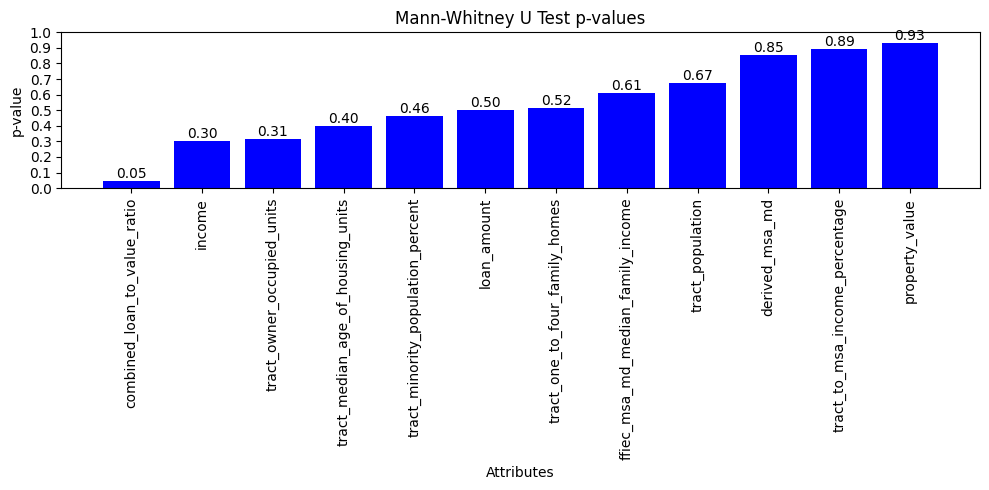

In [59]:
import pandas as pd
from scipy.stats import mannwhitneyu
import matplotlib.pyplot as plt
import numpy as np

# Load your data
data = pd.read_csv("sex_dataset.csv")

# Make sure 'Gender' column doesn't have NaN values, or handle them accordingly
group1, group2 = data['derived_sex'].dropna().unique()[:2]

# Initialize a list to store test results
mann_whitney_results = []

# Loop over numerical columns to perform the Mann-Whitney U test
for num_col in numerical_cols:
    # Extract data for both groups
    group1_data = data[data['derived_sex'] == group1][num_col].dropna()
    group2_data = data[data['derived_sex'] == group2][num_col].dropna()

    # Perform Mann-Whitney U test if both groups have enough data
    if len(group1_data) > 0 and len(group2_data) > 0:
        U_statistic, p_value = mannwhitneyu(group1_data, group2_data)
        mann_whitney_results.append([num_col, p_value])

# Create a DataFrame from the results
mann_whitney_df = pd.DataFrame(mann_whitney_results, columns=['Attribute', 'p_value'])

# Sort the DataFrame by p-value for better visualization
mann_whitney_df_sorted = mann_whitney_df.sort_values(by='p_value')

# Plot
plt.figure(figsize=(10, 5))  # Adjust size as needed
plt.bar(mann_whitney_df_sorted['Attribute'], mann_whitney_df_sorted['p_value'], color='blue')
plt.xlabel('Attributes')
plt.ylabel('p-value')
plt.title('Mann-Whitney U Test p-values')
plt.xticks(rotation=90)  # Rotate attribute names to avoid overlap
plt.yticks(np.arange(0, 1.1, step=0.1))  # Adjust y-axis ticks if necessary

# Optionally add p-value labels on top of each bar
for index, value in enumerate(mann_whitney_df_sorted['p_value']):
    plt.text(index, value, f"{value:.2f}", ha='center', va='bottom')

# Show the plot
plt.tight_layout()  # Adjust layout
plt.show()

In [62]:
sex_dataset = pd.read_csv('sex_dataset.csv')

female_approved_mask = (sex_dataset['derived_sex'] == 0.0) & (sampled_data['action_taken'] == 1.0)

# Calculate 15% of these entries to change to 'Denied'
num_to_change_female = int(np.ceil(female_approved_mask.sum() * 0.20))

# Randomly select 15% of these entries and change their 'action_taken' status to 'Denied'
change_indices_female = sex_dataset[female_approved_mask].sample(n=num_to_change_female, random_state=42).index
sex_dataset.loc[change_indices_female, 'action_taken'] = 0.0

sex_dataset.to_csv("added_sex_bias.csv", index=False)